## <center>Homework2 - IE7275 - Group1</center>

## Importing libraries

In [146]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.spatial import distance

## Question 1

<AxesSubplot:>

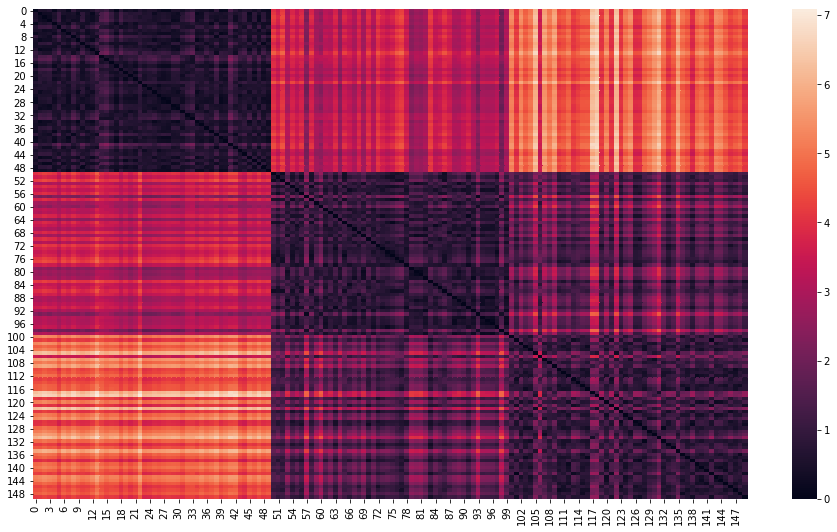

In [162]:
df_iris = pd.read_csv('iris.csv')
df_iris_euclidean = pd.DataFrame(euclidean_distances(df_iris.iloc[:,:-1].values, df_iris.iloc[:,:-1].values), 
                       index=df_iris.index, columns=df_iris.index)
plt.figure(figsize=(16,9))
sns.heatmap(df_iris_euclidean)

### Inference:
#### 1. Data is similar around the diagonal which shows redundancy amongst the variety. Heatmap can be reduced to just one side of the diagonal.
#### 2. Setosa and Virginica has the most distance among all the varieties as it is shown through a light color which is represting higher distance.
#### 3. Versicolor and Setosa has an approximate average distance of the total between them.
#### 4. Dark color in heatmap shows the similar distance amongst each variety.

## Question 2

In [148]:
print("Enter size of first vector")
num_of_ele_first = np.int(input())
print("\nEnter the numbers into first vector")
arr_first = []
for i in range(0,num_of_ele_first):
    arr_first.append(input())

print("\nEnter size of second vector")
num_of_ele_second = np.int(input())
print("\nEnter the numbers into second vector")
arr_second = []
for i in range(0,num_of_ele_second):
    arr_second.append(input())

print("\nName the type of distance to be calculated")
type_of_distance = input()

def minkowskiDistance(first_vector, second_vector, t='euclidean'):
    for i in first_vector:
        if not i.replace('.', '', 1).isdigit():
            return "Non numeric array detected in place of numeric"
    for j in second_vector:
        if not j.replace('.', '', 1).isdigit():
            return "Non numeric array detected in place of numeric"

    first_vector = first_vector.astype(np.float)
    second_vector = second_vector.astype(np.float)
    
    if t == 'euclidean':
        return distance.euclidean(first_vector,second_vector)
    elif t == 'manhattan':
        return distance.cityblock(first_vector,second_vector)
    elif t == 'maxdistance':
        return distance.chebyshev(first_vector,second_vector)
    
if len(type_of_distance.strip()) == 0:
    type_of_distance = "euclidean"
    
print(minkowskiDistance(np.array(arr_first),np.array(arr_second),type_of_distance))

Enter size of first vector
3

Enter the numbers into first vector
1
1
1

Enter size of second vector
3

Enter the numbers into second vector
1
1
1

Name the type of distance to be calculated

0.0


## Question 3

,A,B,C,D,E
A,0.000000,2.236068,2.236068,2.449490,2.236068
B,2.236068,0.000000,2.000000,3.000000,0.000000
C,2.236068,2.000000,0.000000,2.236068,2.000000
D,2.449490,3.000000,2.236068,0.000000,3.000000
E,2.236068,0.000000,2.000000,3.000000,0.000000


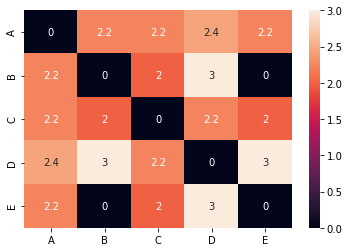

In [149]:
df_candidates_replaced = df_candidates.replace({'poor':0,'fair':1,'good':2})
df_candidates_dist = pd.DataFrame(distance_matrix(df_candidates_replaced.iloc[:,1:].values, df_candidates_replaced.iloc[:,1:].values), 
                                index=candidate_axis_labels, columns=candidate_axis_labels)
sns.heatmap(df_candidates_dist, annot=True)
df_candidates_dist

## Question 4

### Creating csv files from text files

In [150]:
fileNames_86 = ['198601.txt','198602.txt','198603.txt','198604.txt',
             '198605.txt','198606.txt','198607.txt','198608.txt','198609.txt','198610.txt','198611.txt','198612.txt']
fileNames_90 = ['199001.txt','199002.txt','199003.txt','199004.txt',
             '199005.txt','199006.txt','199007.txt','199008.txt','199009.txt','199010.txt','199011.txt','199012.txt']
fileNames_95 = ['199501.txt','199502.txt','199503.txt','199504.txt',
             '199505.txt','199506.txt','199507.txt','199508.txt','199509.txt','199510.txt','199511.txt','199512.txt']

fileList = [fileNames_86,fileNames_90,fileNames_95]

columnNames = ['Year','Month','Day','Time','Longitude','Latitude','Depth','Magnitude','RMS of residual','Nuber of stations','Region name']

# function to read .txt file line by line and create csv file for each year
def readWholeFile(fileName,csv_fileName):
    file = open(fileName,"r")
    lines = file.readlines()
    with open(csv_fileName, "a") as csv_file:
        jp_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for line in lines:
            line = line.replace("*"," ")
            split_line = line.split(' ')
            str = [i.strip('') for i in split_line]
            str = list(filter(None, str))
            region_name = ' '.join(str[10:])
            str[10] = region_name
            jp_writer.writerow(str[0:11])
    file.close()
   
for x in fileList:
    for i in x:
        readWholeFile(i, i[0:4] + ".csv")

### Reading created csv files and creating interevent column

In [151]:
# reading files into dataframe
df_86 = pd.read_csv('1986.csv',names=columnNames)
df_90 = pd.read_csv('1990.csv',names=columnNames)
df_95 = pd.read_csv('1995.csv',names=columnNames)

# removing \n from text
df_86 = df_86.replace('\n','', regex=True)
df_90 = df_90.replace('\n','', regex=True)
df_95 = df_95.replace('\n','', regex=True)

# converting time column into dateformat
df_86['Time'] = pd.to_datetime(df_86['Time'], format='%H:%M:%S.%f', errors = 'coerce')
df_90['Time'] = pd.to_datetime(df_90['Time'], format='%H:%M:%S.%f', errors = 'coerce')
df_95['Time'] = pd.to_datetime(df_95['Time'], format='%H:%M:%S.%f', errors = 'coerce')

# calculate time difference
df_86['interevent time'] = df_86['Time'].diff()
df_90['interevent time'] = df_90['Time'].diff()
df_95['interevent time'] = df_95['Time'].diff()

# converting timedelta to seconds
df_86['interevent time'] = df_86['interevent time'] / np.timedelta64(1, 's')
df_90['interevent time'] = df_90['interevent time'] / np.timedelta64(1, 's')
df_95['interevent time'] = df_95['interevent time'] / np.timedelta64(1, 's')

# combining all years into a single dataframe
df_allyear = pd.concat([df_86,df_90,df_95]).reset_index(drop=True)

### Density Plot for all years combined

(0.0, 10000.0)

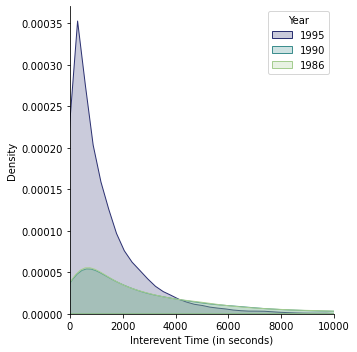

In [152]:
sns.displot(df_allyear[df_allyear['interevent time'] > 0], x='interevent time', 
            kind = 'kde', 
            hue = 'Year',
            palette='crest',
            fill = 'Year',
           legend=False).set(xlabel='Interevent Time (in seconds)')
plt.legend(title='Year',labels=['1995','1990', '1986'])
plt.xlim(0, 10000)

### Density Plot for 1986

(0.0, 15000.0)

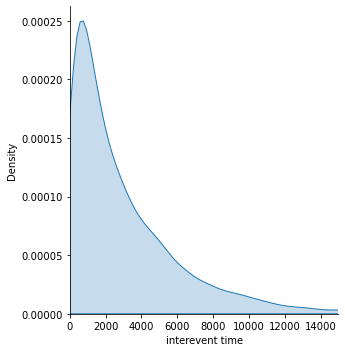

In [153]:
sns.displot(df_86[df_86['interevent time'] > 0], x='interevent time', kind= 'kde', fill='Year')
plt.xlim(0, 15000)

### Density Plot for 1990

(0.0, 15000.0)

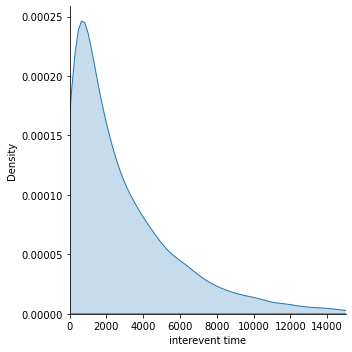

In [154]:
sns.displot(df_90[df_90['interevent time'] > 0], x='interevent time', kind = 'kde', fill='Year')
plt.xlim(0, 15000)

### Density Plot for 1995

(0.0, 15000.0)

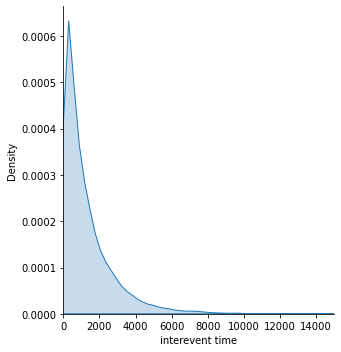

In [155]:
sns.displot(df_95[df_95['interevent time'] > 0], x='interevent time', kind = 'kde', fill='Year')
plt.xlim(0, 15000)